In [1]:
import pandas

In [2]:
question = pandas.read_csv('./data/question.csv')
answer = pandas.read_csv('./data/answer.csv')

len(question), len(answer)

(120000, 226266)

In [3]:
question.head()

,question_id,content
0,65102009,头痛恶心肌肉痛关节痛颈部淋巴结疼痛怎么回事啊
1,44275784,我怀孕37周，肠子一直呼噜呼噜叫感觉像是在里面灌水，上厕所拉稀和喷水一样，一天上厕所5次，对...
2,42163349,男，67岁，2天前突然出现右小腿（类似抽筋症状），现出现右小腿消肿，有指压痕，无，请问可能是...
3,67935540,怀孕前两个月照了CT和X光，来两次月经后怀孕了，怀孕期间有轻微盆腔积水吃了两瓶杏香兔耳片。请...
4,33429289,阴囊湿冷阳痿早泻请问用点什么药


In [4]:
answer.head()

,ans_id,question_id,content
0,0,45619783,月经延迟十四天而且伴随恶心，头痛，乏力的现象，那么考虑怀孕的概率是非常大的，建议你去医院检查...
1,1,45619783,如果你的月经周期规律，有正常的性生活，未采取任何有效的避孕措施，此时的症状考虑有怀孕的可能。...
2,2,45619783,建议在性生活过后14天左右可以用怀孕试纸自我检测一下，一般怀孕试纸显示2条线的话是怀孕了的，...
3,3,26616465,头痛是临床上最为常见的临床症状之一，是人体对各种致痛因素所产生的主观感觉，属于疼痛的范畴。建...
4,4,26616465,头痛主要是由于头部的血管、神经、脑膜等对疼痛敏感的组织受到刺激引起的。由紧张、疲劳、饮酒等原...


## Rule:

* 一个答案对应一个问题，一个问题对应多个答案。
* 不同答案拆分到不同的QA中
* 超长的答案拆分到不同的QA中


In [5]:
# 找出最长的回答的长度.

max_len = 0
for i in range(len(answer)):
    if len(answer.iloc[i]['content']) > max_len:
        max_len = len(answer.iloc[i]['content'])

In [6]:
max_len

249

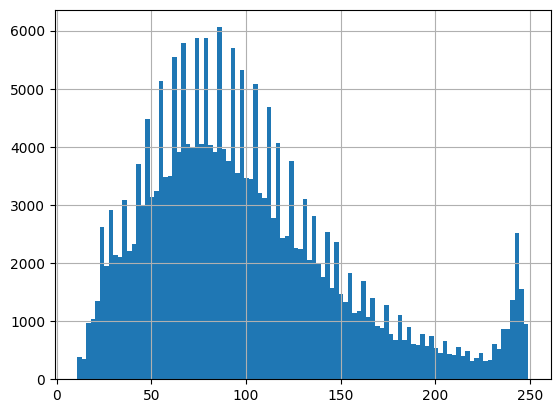

In [7]:
# 用柱状图的形式统计回答的长度分布.

import matplotlib.pyplot as plt

answer['content_len'] = answer['content'].apply(len)
answer['content_len'].hist(bins=100)
plt.show()

In [8]:
# 找出最长的问题的长度.

max_len = 0
for i in range(len(question)):
    if len(question.iloc[i]['content']) > max_len:
        max_len = len(question.iloc[i]['content'])

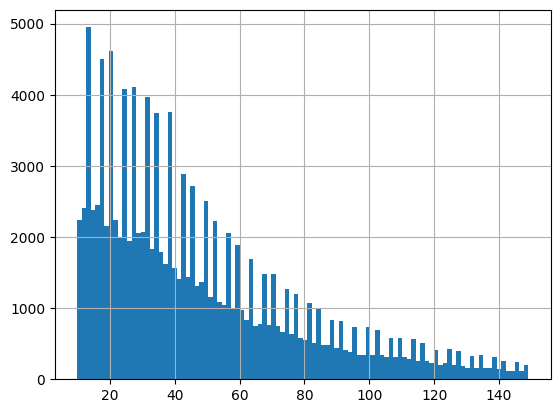

In [9]:
# 用柱状图的形式统计问题的长度分布.

question['content_len'] = question['content'].apply(len)
question['content_len'].hist(bins=100)
plt.show()

In [10]:
max_len

149

In [11]:
# 丢弃长度超过150的答案

answer = answer[answer['content_len'] <= 100]

# 写入文件,utf-8编码

answer.to_csv('./data/answer_clean.csv', index=False, encoding='utf-8')

## 制作QA对

{  
    "instruction": "现在你要扮演皇帝身边的女人--甄嬛",  
    "input":"你是谁？",  
    "output":"家父是大理寺少卿甄远道。"  
}  

In [12]:
# 读取answer_clean.csv
answer = pandas.read_csv('./data/answer_clean.csv')

# input 是问题，但是问题和回答的映射存在answer中
output = answer["content"][0]

# input 的 question_id 是 answer["question_id"][0]
question_id = answer["question_id"][0]
input = question[question["question_id"] == question_id]["content"].values[0]

# 写入字典
qa = {}
qa["instruction"] = input
qa["input"] = ""
qa["output"] = output

In [13]:
qa

{'instruction': '头痛头昏十几年前。吹风和晒太阳。吵闹都会头疼没有检查出来结果应该怎样治疗',
 'input': '',
 'output': '头痛是临床上最为常见的临床症状之一，是人体对各种致痛因素所产生的主观感觉，属于疼痛的范畴。建议临床上最常用的是非甾体抗炎镇痛药，包括对乙酰氨基酚，布洛芬、双氯酚酸钾等。必要时做脑部CT检查一下。'}

In [15]:
# 生成所有的 QA 对, 保存dict到 ./data/qa.json
from tqdm import tqdm
qa_list = []
for i in tqdm(range(len(answer))):
    output = answer["content"][i]
    question_id = answer["question_id"][i]
    input = question[question["question_id"] == question_id]["content"].values[0]
    qa = {}
    qa["instruction"] = input
    qa["input"] = ""
    qa["output"] = output
    if len(input) < 60:
        qa_list.append(qa)

100%|██████████| 130188/130188 [00:27<00:00, 4655.10it/s]


In [16]:
len(qa_list)

96771

In [17]:
qa_list

[{'instruction': '头痛头昏十几年前。吹风和晒太阳。吵闹都会头疼没有检查出来结果应该怎样治疗',
  'input': '',
  'output': '头痛是临床上最为常见的临床症状之一，是人体对各种致痛因素所产生的主观感觉，属于疼痛的范畴。建议临床上最常用的是非甾体抗炎镇痛药，包括对乙酰氨基酚，布洛芬、双氯酚酸钾等。必要时做脑部CT检查一下。'},
 {'instruction': '头痛头昏十几年前。吹风和晒太阳。吵闹都会头疼没有检查出来结果应该怎样治疗',
  'input': '',
  'output': ':考虑是神经性头疼，是一种功能性的疾病，是由于紧张压力或是精神因素引起的神经功能失调造成的头痛，也有一定的遗传因素，一般可考虑吃些中草药川芎茶调散来治疗。同时结合针灸按摩，效果会更好的。'},
 {'instruction': '眼睛疲劳，老睁不开干涩',
  'input': '',
  'output': '一般是由于结膜炎症活干炎症引起的，可以到医院检查一下。'},
 {'instruction': '女人的左胸下是什么地？那里痛是怎么回事',
  'input': '',
  'output': '心脏在那个位置，心脏绞痛在那，也可能是胃痛导致的，胃痛位置比心脏偏下一点。'},
 {'instruction': '女人的左胸下是什么地？那里痛是怎么回事',
  'input': '',
  'output': '左边有很多脏器，比如心，胃，肠等，你可以具体描述一下疼痛的性质，是钝痛，锐痛还是绞痛，以便于确诊以后对症治疗'},
 {'instruction': '女人的左胸下是什么地？那里痛是怎么回事',
  'input': '',
  'output': '正常情况下，左胸下是心脏的位置，你可能是心脏发生病变，建议你去医院做进一步检查，以明确诊断，对症治疗，希望对你有帮助。'},
 {'instruction': '女人的左胸下是什么地？那里痛是怎么回事',
  'input': '',
  'output': '左边有很多脏器，比如心，胃，肠等，你可以具体描述一下疼痛的性质，是钝痛，锐痛还是绞痛，以便于确诊以后对症治疗'},
 {'instruction': '臀部疼痛，活动受限CT显示腰4―5膨出',
  'input'

In [ ]:
# 存储到文件,utf-8编码
import json
with open('./data/qa.json', 'w', encoding='utf-8') as f:
    json.dump(qa_list, f, ensure_ascii=False, indent=4)

with open('./data/qa_top100.json', 'w', encoding='utf-8') as f:
    json.dump(qa_list[:100], f, ensure_ascii=False, indent=4)

with open('./data/qa_top10000.json', 'w', encoding='utf-8') as f:
    json.dump(qa_list[101:10100], f, ensure_ascii=False, indent=4)

## 定义数据集格式化
Lora 训练的数据是需要经过格式化、编码之后再输入给模型进行训练的，如果是熟悉 Pytorch 模型训练流程的同学会知道，我们一般需要将输入文本编码为 input_ids，将输出文本编码为 labels，编码之后的结果都是多维的向量。我们首先定义一个预处理函数，这个函数用于对每一个样本，编码其输入、输出文本并返回一个编码后的字典： 

经过格式化的数据，也就是送入模型的每一条数据，都是一个字典，包含了 input_ids、attention_mask、labels 三个键值对，其中 input_ids 是输入文本的编码，attention_mask 是输入文本的 attention mask，labels 是输出文本的编码。  
经过decode之后应该还原出来原来的数据类似这样:  

```txt
<|im_start|>system
现在你要扮演皇帝身边的女人--甄嬛.<|im_end|>
<|im_start|>user
小姐，别的秀女都在求中选，唯有咱们小姐想被撂牌子，菩萨一定记得真真儿的——<|im_end|>
<|im_start|>assistant
嘘——都说许愿说破是不灵的。<|im_end|>
<|endoftext|>
```

In [ ]:
# 这些需要下载模型文件和tokenizer,就先不做了.放到别处做.